
## IDENTIFICACION DE FORMACIONES ROCOSAS EN POZOS PETROLEROS

#### Importar librerias y datos

In [ ]:
# Llamamos librerias y tablas
import pandas as pd
import numpy as np
import urllib.request
import re
import nltk
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
import sklearn
%matplotlib inline

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
#tf.__version__

url = 'https://raw.githubusercontent.com/lbsbcyborg/Project_Time_Series_Clustering/main/Coseries%20Pozos3.csv'
etiquetas = pd.read_csv('https://raw.githubusercontent.com/AdrianRinconCol/Project_Time_Series_Clustering/main/etiquetas.csv')
etiquetas['Unnamed: 0']=etiquetas.index
eti=pd.DataFrame(etiquetas)
dt = pd.read_csv(url)
dt.dropna( inplace=True)
dt1 = pd.DataFrame(dt)



En primer lugar revisamos la estructura de los datos y mediciones, como también de las etiquetas

In [ ]:
print(eti)
print(dt1.head())
df2 = dt1[dt1['DEPTH']>7794]

   Unnamed: 0    GR7-3     GR-8   GRA-53
0           0  7794.73  7794.73  7794.73
1           1  7894.23  7944.73  7889.73
2           2  8139.73  8369.73  8209.73
3           3  8469.72  8469.72  8584.70
4           4  8681.70  8681.70  8681.70
        DEPTH  GR7-3  GR7-8  GRA-53
1028  1608.92  69.81  95.57   12.09
1029  1609.42  69.69  95.87   12.09
1030  1609.92  71.06  96.05   12.09
1031  1610.42  73.00  95.66   12.09
1032  1610.92  75.69  95.26   12.80


Luego construimos la funcion de discretización de los valores numericos a textos. para este caso, diseñamos 2 funciones:

* Discretizador cada 10 
* Discretizador cada 1

In [ ]:
# Discretizador cada 10

#Se discretiza solo la parte del data frame p1['GR7-3'] para probar el algoritmo
# El resultado es una lista de strings
def texto2(P1):
  t1=list(P1) 
  T1=[]
  for i in range(0,len(t1)):
    if t1[i]>=0 and t1[i]<=10 :
      k="A1"
      T1.append(k)
    elif t1[i]>10 and t1[i]<=20:
      k="A2"
      T1.append(k)
    elif t1[i]>20 and t1[i]<=30:
      k="A3"
      T1.append(k)
    elif t1[i]>30 and t1[i]<=40:
      k="A4"
      T1.append(k) 
    elif t1[i]>40 and t1[i]<=50:
      k="A5"
      T1.append(k)  
    elif t1[i]>50 and t1[i]<=60:
      k="A6"
      T1.append(k) 
    elif t1[i]>60 and t1[i]<=70:
      k="A7"
      T1.append(k)
    elif t1[i]>70 and t1[i]<=80:
      k="A8"
      T1.append(k)
    elif t1[i]>80 and t1[i]<=90:
      k="A9"
      T1.append(k)
    elif t1[i]>90 and t1[i]<=100:
      k="A10"
      T1.append(k)
    elif t1[i]>100 and t1[i]<=110:
      k="A11"
      T1.append(k)
    elif t1[i]>110 and t1[i]<=120:
      k="A12"
      T1.append(k)
    elif t1[i]>120 and t1[i]<=130:
      k="A13"
      T1.append(k)
    elif t1[i]>130 and t1[i]<=140:
      k="A14"
      T1.append(k)
    elif t1[i]>140 and t1[i]<=150:
      k="A15"
      T1.append(k) 
    elif t1[i]>150:
      k="A16"
      T1.append(k)                
  #print(T1)
  return T1

In [ ]:
#Discretizador 2, mas palabras, cada 1
#j="perro"
#n=8.23
#m=str(int(n))
#k=j+m
#k

def texto(P2):
  t1=list(P2) 
  T1=[]
  for i in range(0,len(t1)):
      numero=str(int(t1[i]))
      letra="A"
      k=letra+numero
      T1.append(k)
  return T1

Luego aplicamos la función de discretización para transformar los valores en palabras, y generamos una nueva tabla con los textos (párrafos) y sus respectivas etiquetas

In [ ]:
# Generador de tabla con las palabras por cada etiqueta
V=[]
Tabla1 = pd.DataFrame(columns = ['GR_Discretizado' , 'etiqueta','pozo'])
for i in range(len(dt1.columns)):
  if i>=1:
    V1=dt1.iloc[:,i]
    for j in range(len(eti)-1):
      x1=V1.loc[dt1[dt1.iloc[:,0]==eti.iloc[j,i]].index[0]:dt1[dt1.iloc[:,0]==eti.iloc[j+1,i]].index[0]]# Nueva parte del codigo
      D=texto(x1)
      cadena =" ".join(D)
      Tabla1=Tabla1.append({'GR_Discretizado':cadena,'etiqueta':eti.iloc[j,0]}, ignore_index=True)
      #for k in range(0,50):
      for k in range(0,100):  
        noise= np.random.normal(0, 1, x1.shape)+x1
        D=texto(noise)       
        cadena =" ".join(D)
        Tabla1=Tabla1.append({'GR_Discretizado':cadena,'etiqueta':eti.iloc[j,0],'pozo':dt1.columns.values[i]}, ignore_index=True)
Tabla1

,GR_Discretizado,etiqueta,pozo
0,A86 A91 A98 A97 A96 A92 A91 A91 A91 A93 A98 A1...,0,NaN
1,A87 A92 A98 A94 A96 A94 A91 A91 A92 A93 A98 A1...,0,GR7-3
2,A87 A92 A98 A97 A96 A92 A91 A92 A91 A92 A100 A...,0,GR7-3
3,A88 A90 A99 A99 A96 A91 A92 A90 A91 A91 A100 A...,0,GR7-3
4,A88 A91 A97 A99 A95 A94 A92 A91 A92 A94 A98 A1...,0,GR7-3
...,...,...,...
1207,A91 A92 A95 A94 A90 A86 A78 A74 A65 A64 A64 A6...,3,GRA-53
1208,A92 A89 A95 A97 A90 A84 A78 A75 A68 A63 A64 A6...,3,GRA-53
1209,A91 A90 A95 A95 A90 A85 A77 A75 A69 A66 A63 A6...,3,GRA-53
1210,A89 A90 A96 A96 A91 A84 A76 A74 A66 A66 A63 A6...,3,GRA-53


Como los datos se encuentran ordenados por etiquetas, los reordenamos aleatoriamente para que pueda funcionar el entrenamiento de los modelos.

In [ ]:
Tabla=Tabla1.sample(frac=1)
Tabla.tail()

,GR_Discretizado,etiqueta,pozo
203,A59 A54 A44 A45 A52 A55 A59 A49 A45 A41 A41 A3...,2,GR7-3
295,A61 A52 A45 A45 A52 A59 A59 A50 A45 A40 A40 A4...,2,GR7-3
969,A91 A92 A89 A84 A82 A93 A103 A103 A97 A90 A81 ...,1,GRA-53
491,A100 A105 A107 A111 A113 A118 A121 A126 A132 A...,0,GR7-8
383,A79 A74 A74 A72 A79 A83 A82 A78 A72 A71 A72 A7...,3,GR7-3


In [ ]:
#Encontrar el numero mas grande de palabras dentro de todos los documentos a analizar
maxlengthlist=[]
for i in range(len(Tabla)):
  cadenaPalabras=len(Tabla.iloc[i,0])
  maxlengthlist.append(cadenaPalabras)
max_length=(max(maxlengthlist))
max_length

3509

### MODELO 1: ANÁLISIS DE SENTIMIENTO

1. Pasamos las etiquetas a categorias "one hot"

In [ ]:
# convert airline_seentiment to numeric
from tensorflow.keras.utils import to_categorical

#etiqueta_label = Tabla.etiqueta.factorize() # convierte a factores numéricos

y_train = to_categorical(Tabla['etiqueta'])
y_train

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#tweet = Tabla.GR_Discretizado.values
tokenizer = Tokenizer(num_words=200)
#tokenizer.fit_on_texts(tweet)
#vocab_size = len(tokenizer.word_index) + 1
#encoded_docs = tokenizer.texts_to_sequences(tweet)

vocab_size = 200
docs=Tabla.GR_Discretizado.values
encoded_docs = [one_hot(d, vocab_size) for d in docs]

padded_sequence = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

In [ ]:
#print(tweet[0])
print(encoded_docs[0])
print(padded_sequence[0])

[179, 67, 106, 97, 172, 97, 97, 127, 8, 106, 94, 94, 167, 179, 67, 172, 74, 11, 63, 18, 185, 172, 97, 172, 18, 8, 18, 173, 106, 67, 106, 67, 185, 10, 94, 163, 51, 97, 74, 74, 72, 11, 137, 50, 67, 74, 173, 172, 63, 179, 179, 8, 94, 163, 163, 141, 7, 3, 141, 141, 94, 94, 94, 167, 163, 94, 7, 10, 115, 46, 139, 182, 108, 35, 35, 122, 63, 101, 3, 10, 115, 71, 117, 117, 94, 141, 160, 160, 10, 94, 167, 192, 141, 94, 94, 94, 167, 94, 51, 51, 163, 192, 7, 7, 3, 179, 94, 10, 1, 163, 94, 179, 127, 172, 173, 7, 173, 173, 173, 18, 18, 173, 63, 74, 72, 7, 173, 97, 8, 18, 8, 173, 74, 72, 74, 11, 74, 7, 8, 173, 172, 7, 7, 97, 97, 67, 173, 97, 18, 67, 185, 179, 51, 51, 185, 67, 173, 172, 7, 63, 18, 8, 67, 67, 106, 179, 8, 172, 7, 106, 94, 163, 10, 51, 179, 67, 173, 63, 74, 74, 7, 74, 11, 179, 173, 97, 67, 8, 51, 7, 12, 94, 12, 122, 122, 46, 17, 169, 17, 140, 35, 115, 11, 3, 11, 179, 122, 17, 17, 140, 136, 71, 71, 136, 136, 94, 115, 3, 115, 11, 11, 11, 11, 115, 115, 179, 12, 101, 115, 1, 10, 18, 97, 173

2. Estructura del Modelo

In [ ]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

embedding_vector_length = 5
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=max_length) )

model.add(SpatialDropout1D(0.25))
#model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(len(eti)-1, activation='softmax')) 
model.compile(loss='CategoricalCrossentropy',optimizer='adam', metrics=['accuracy'])  

print(model.summary()) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 3509, 5)           1000      
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 3509, 5)           0         
_________________________________________________________________
dropout (Dropout)            (None, 3509, 5)           0         
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 17545)             0         
_________________________________________________________________
dense (Dense)                (None, 4)                 70184     
Total params: 71,184
Trainable params: 71,184
Non-trainable params: 0
_________________________________________________________________
None


3. Entrenamiento del modelo

In [ ]:
history = model.fit(padded_sequence,y_train,validation_split=0.2, epochs=7, batch_size=32)

Epoch 1/7
31/31 [==============================] - 4s 12ms/step - loss: 1.1514 - accuracy: 0.5284 - val_loss: 0.7190 - val_accuracy: 0.8601
Epoch 2/7
31/31 [==============================] - 0s 7ms/step - loss: 0.4674 - accuracy: 0.9216 - val_loss: 0.1882 - val_accuracy: 1.0000
Epoch 3/7
31/31 [==============================] - 0s 7ms/step - loss: 0.1535 - accuracy: 0.9979 - val_loss: 0.0533 - val_accuracy: 1.0000
Epoch 4/7
31/31 [==============================] - 0s 7ms/step - loss: 0.0648 - accuracy: 1.0000 - val_loss: 0.0189 - val_accuracy: 1.0000
Epoch 5/7
31/31 [==============================] - 0s 7ms/step - loss: 0.0362 - accuracy: 1.0000 - val_loss: 0.0097 - val_accuracy: 1.0000
Epoch 6/7
31/31 [==============================] - 0s 7ms/step - loss: 0.0285 - accuracy: 0.9990 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 7/7
31/31 [==============================] - 0s 7ms/step - loss: 0.0235 - accuracy: 0.9979 - val_loss: 0.0036 - val_accuracy: 1.0000


4. Visualización de las métricas y rendimiento del entrenamiento del modelo

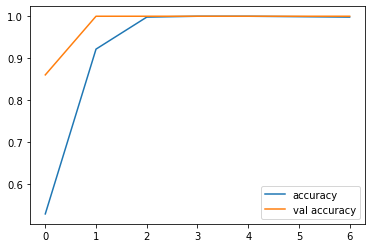

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

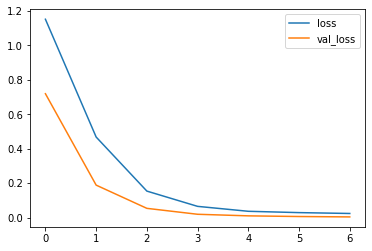

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

### Funciones para encontrar la formación rocosa en un pozo nuevo

1. Primero diseñamos una función que nos permita predecir la etiqueta de un segmento de pozo especifico

In [ ]:
def verificar_roca(pedazo):
  prueba = []
  prueba.append(pedazo)
  
  #tweet = Tabla.GR_Discretizado.values
  tokenizer = Tokenizer(num_words=200)
  #tokenizer.fit_on_texts(tweet)
  #vocab_size = len(tokenizer.word_index) + 1
  #encoded_docs = tokenizer.texts_to_sequences(tweet)

  vocab_size = 200
  docs=prueba
  encoded_docs = [one_hot(d, vocab_size) for d in docs]

  prueba_sequence = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

  prediction = model.predict(prueba_sequence)
  
  return prediction



2. Probamos que la función de predicción de etiqueta si esté funcionando bien 

In [ ]:
Tabla[Tabla['pozo']=='GR7-8']['GR_Discretizado'].values[0]

'A65 A61 A62 A58 A57 A58 A58 A64 A60 A62 A68 A73 A70 A65 A61 A57 A53 A51 A54 A59 A63 A57 A58 A57 A59 A60 A59 A56 A62 A61 A62 A61 A63 A67 A73 A71 A66 A58 A52 A52 A50 A51 A48 A45 A47 A53 A56 A57 A54 A49 A49 A60 A68 A71 A71 A74 A77 A78 A74 A74 A68 A68 A68 A70 A71 A73 A77 A80 A81 A89 A95 A102 A108 A114 A114 A107 A98 A85 A78 A80 A81 A88 A91 A91 A84 A74 A69 A69 A67 A68 A70 A72 A74 A73 A68 A68 A70 A68 A66 A66 A71 A72 A77 A77 A78 A82 A84 A80 A76 A71 A68 A65 A64 A57 A56 A55 A56 A56 A56 A59 A59 A56 A54 A52 A50 A55 A56 A58 A60 A59 A60 A56 A53 A50 A52 A51 A53 A55 A60 A56 A57 A55 A55 A58 A58 A61 A56 A58 A59 A61 A63 A65 A66 A66 A63 A61 A56 A57 A55 A54 A59 A60 A61 A61 A62 A65 A60 A57 A55 A62 A68 A71 A67 A66 A65 A61 A56 A54 A52 A52 A55 A53 A51 A49 A56 A58 A61 A60 A66 A77 A83 A84 A83 A86 A86 A89 A93 A92 A93 A94 A87 A81 A79 A78 A79 A82 A86 A93 A93 A94 A90 A88 A88 A90 A90 A84 A81 A78 A81 A79 A79 A79 A79 A81 A81 A82 A83 A85 A81 A76 A67 A59 A58 A56 A60 A65 A66 A67 A68 A66 A73 A72 A77 A74 A72 A74 A69 A71 A6

In [ ]:
verificar_roca(Tabla[Tabla['pozo']=='GR7-8']['GR_Discretizado'].values[0])

array([[1.5201993e-04, 1.0683215e-03, 1.4705009e-04, 9.9863261e-01]],
      dtype=float32)

In [ ]:
Tabla[Tabla['pozo']=='GR7-8'].head(1)

,GR_Discretizado,etiqueta,pozo
775,A65 A61 A62 A58 A57 A58 A58 A64 A60 A62 A68 A7...,3,GR7-8


3. Funcion de escaneo por ventana para el modelo 1. 

In [ ]:

def funcion_escaneo_m1(mediciones_pozo,fin,ventana_inicial,step_ventana,step_iterador):
  inicio = 0
  i=0
  step = ventana_inicial
  step_ventana = step_ventana
  tabla_ventanas = pd.DataFrame(columns = ['pred_0','pred_1','pred_2','pred_3' , 'ventana','inicio','fin'])

  while inicio < fin+1:
    #print('hola')
    while i+step < fin+1:
      txt = texto(mediciones_pozo[i:i+step].values)
      string =' '.join([str(item) for item in txt])

      #print(i)
      #tabla_ventanas=tabla_ventanas.append({'valores':verificar_roca(string),'ventana':ventana,'inicio':inicio,'fin':inicio+ventana}, ignore_index=True)
      tabla_ventanas=tabla_ventanas.append({'pred_0':verificar_roca(string)[0][0],'pred_1':verificar_roca(string)[0][1],
                                            'pred_2':verificar_roca(string)[0][2],'pred_3':verificar_roca(string)[0][3],
                                            'ventana':step,'inicio':i,'fin':i+step}, ignore_index=True)
      
      i +=step_iterador
    i = 0
    step = step+step_ventana
    inicio +=step_ventana
  return tabla_ventanas   


In [ ]:
# prueba(pozo a estudiar, )
df = funcion_escaneo_m1(df2['GRA-53'],1777,200,2000,50)
df

In [ ]:
df[df['pred_3']==max(df['pred_3'])]

,pred_0,pred_1,pred_2,pred_3,ventana,inicio,fin
13,0.401817,0.00267,0.150393,0.445119,200.0,650.0,850.0


In [ ]:
df.sort_values(by='pred_3',ascending=False).head(50)
#df[df['inicio']==1550]

,pred_0,pred_1,pred_2,pred_3,ventana,inicio,fin
13,0.401817,0.002670,0.150393,0.445119,200.0,650.0,850.0
12,0.550408,0.002373,0.069232,0.377988,200.0,600.0,800.0
9,0.514651,0.002195,0.124877,0.358277,200.0,450.0,650.0
6,0.500409,0.002620,0.140751,0.356221,200.0,300.0,500.0
7,0.542387,0.002361,0.136271,0.318982,200.0,350.0,550.0
11,0.610566,0.002385,0.079477,0.307572,200.0,550.0,750.0
14,0.518313,0.002794,0.178628,0.300265,200.0,700.0,900.0
25,0.542228,0.002938,0.162546,0.292289,200.0,1250.0,1450.0
29,0.627712,0.001627,0.100044,0.270617,200.0,1450.0,1650.0
20,0.531778,0.004756,0.199864,0.263602,200.0,1000.0,1200.0


### MODELO 2: Doc2Vec Model


In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import gensim


In [ ]:
rocas = Tabla['GR_Discretizado'].apply(lambda x: x.split())

In [ ]:
rocas.head()

997     [A93, A88, A88, A84, A81, A92, A102, A104, A98...
1077    [A60, A57, A56, A51, A52, A53, A60, A64, A69, ...
1016    [A58, A57, A54, A51, A52, A53, A60, A66, A70, ...
592     [A103, A103, A102, A101, A101, A104, A105, A10...
1068    [A60, A57, A57, A53, A52, A54, A61, A65, A67, ...
Name: GR_Discretizado, dtype: object

In [ ]:
labels = y_train

In [ ]:
len(labels)

1212

In [ ]:
def tagged_document(list_of_list_of_words):
  for i, list_of_words in enumerate(list_of_list_of_words):
    yield gensim.models.doc2vec.TaggedDocument(list_of_words, [i])

datos_for_training = list(tagged_document(list(rocas)))

In [ ]:
datos_for_training[0]

TaggedDocument(words=['A93', 'A88', 'A88', 'A84', 'A81', 'A92', 'A102', 'A104', 'A98', 'A84', 'A82', 'A85', 'A84', 'A85', 'A95', 'A95', 'A92', 'A94', 'A91', 'A95', 'A96', 'A105', 'A105', 'A107', 'A105', 'A105', 'A104', 'A100', 'A76', 'A57', 'A46', 'A45', 'A47', 'A51', 'A53', 'A53', 'A54', 'A56', 'A53', 'A53', 'A53', 'A49', 'A52', 'A52', 'A49', 'A51', 'A52', 'A52', 'A51', 'A53', 'A57', 'A58', 'A58', 'A60', 'A58', 'A56', 'A55', 'A51', 'A51', 'A50', 'A51', 'A54', 'A53', 'A51', 'A57', 'A56', 'A56', 'A54', 'A50', 'A51', 'A53', 'A55', 'A51', 'A51', 'A51', 'A51', 'A55', 'A52', 'A50', 'A49', 'A53', 'A56', 'A60', 'A58', 'A53', 'A46', 'A42', 'A41', 'A36', 'A37', 'A37', 'A37', 'A39', 'A40', 'A41', 'A42', 'A38', 'A42', 'A49', 'A48', 'A51', 'A53', 'A55', 'A63', 'A69', 'A69', 'A63', 'A65', 'A62', 'A55', 'A52', 'A53', 'A48', 'A48', 'A49', 'A51', 'A52', 'A49', 'A57', 'A64', 'A61', 'A54', 'A54', 'A57', 'A54', 'A53', 'A53', 'A54', 'A53', 'A52', 'A56', 'A52', 'A53', 'A54', 'A62', 'A65', 'A62', 'A63', 'A6

In [ ]:
model2 = gensim.models.doc2vec.Doc2Vec(vector_size=64, min_count=2, epochs=30)
model2.build_vocab(datos_for_training[:1000])

In [ ]:
model2.train(datos_for_training[:1000], total_examples=model2.corpus_count, epochs=model2.epochs)

In [ ]:
model2.infer_vector(rocas[400])

array([-0.05152537, -0.20607522,  0.3027216 ,  0.09806642,  0.0651434 ,
       -0.28083646,  0.09434255, -0.07075154, -0.13829999,  0.01520157,
       -0.34194526,  0.10988463, -0.3335661 ,  0.29749882, -0.09879865,
       -0.07284915,  0.3459788 ,  0.2666757 ,  0.07239928, -0.53453684,
       -0.11827266,  0.09844284, -0.04542831,  0.30141965,  0.1573298 ,
        0.5341808 , -0.08999005,  0.0140808 , -0.6011365 , -0.4121896 ,
       -0.22092742, -0.11553036,  0.5291611 ,  0.17660181, -0.07198253,
       -0.12850966,  0.07547493,  0.23843834, -0.21173596,  0.27857652,
        0.34441963, -0.3137558 ,  0.18722299,  0.14170516,  0.3808495 ,
        0.15224433,  0.07836509, -0.39347255, -0.04353816, -0.26948774,
        0.05581734, -0.35166568, -0.30070063,  0.07098771, -0.39111158,
        0.20628463,  0.00831073, -0.2834718 , -0.18462151,  0.04229801,
        0.11641648,  0.386542  , -0.41993597,  0.07793084], dtype=float32)

In [ ]:
len(rocas[400])

425

In [ ]:
model2.docvecs.most_similar(400)

[(858, 0.9591870903968811),
 (718, 0.9531890153884888),
 (820, 0.9521266222000122),
 (123, 0.9492908716201782),
 (291, 0.9461901783943176),
 (354, 0.944682776927948),
 (220, 0.9441170692443848),
 (346, 0.9438958168029785),
 (39, 0.9435083270072937),
 (887, 0.9412696361541748)]

In [ ]:
rocas_vector = Tabla['GR_Discretizado'].apply(lambda x: model2.infer_vector(x.split()))

In [ ]:
rocas_vector = np.stack(rocas_vector.values)

In [ ]:
rocas_vector.shape

(1212, 64)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(rocas_vector, labels, test_size=0.33)

### modelo de con vectores Doc2Vec

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation


In [ ]:
model1 = Sequential()

model1.add(Dense(64,activation='relu',input_dim=64))
model1.add(Dropout(0.2))
model1.add(Dense(32,activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(16,activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(8,activation='relu'))
model1.add(Dense(len(eti)-1, activation='softmax')) 
model1.compile(loss='CategoricalCrossentropy',optimizer='adam', metrics=['accuracy'])  

print(model1.summary()) 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 8)                

In [ ]:
#history1 = model1.fit(rocas_vector,labels,validation_split=0.2,epochs=20,batch_size=128) 
history1 = model1.fit(X_train,y_train,validation_split=0.2,epochs=10,batch_size=1)

Epoch 1/10
649/649 [==============================] - 3s 3ms/step - loss: 1.1337 - accuracy: 0.4643 - val_loss: 0.1459 - val_accuracy: 0.9939
Epoch 2/10
649/649 [==============================] - 2s 2ms/step - loss: 0.2146 - accuracy: 0.9441 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 3/10
649/649 [==============================] - 2s 2ms/step - loss: 0.0644 - accuracy: 0.9903 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 4/10
649/649 [==============================] - 2s 3ms/step - loss: 0.0208 - accuracy: 0.9951 - val_loss: 0.0381 - val_accuracy: 0.9877
Epoch 5/10
649/649 [==============================] - 2s 3ms/step - loss: 0.0430 - accuracy: 0.9853 - val_loss: 0.0097 - val_accuracy: 0.9939
Epoch 6/10
649/649 [==============================] - 2s 3ms/step - loss: 0.0172 - accuracy: 0.9931 - val_loss: 3.7820e-04 - val_accuracy: 1.0000
Epoch 7/10
649/649 [==============================] - 2s 3ms/step - loss: 0.0118 - accuracy: 0.9949 - val_loss: 2.5277e-04 - val_accuracy: 1.000

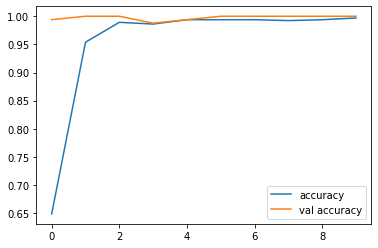

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

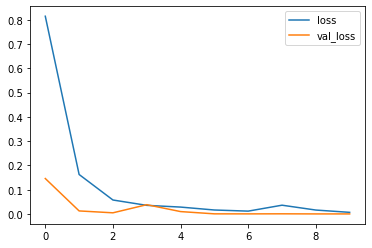

In [ ]:
plt.plot(history1.history['loss'], label='loss')
plt.plot(history1.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
rocas_vector[0]

array([ 0.26892075,  0.1908329 , -0.3760123 ,  0.24602513,  0.01715033,
       -0.1585358 , -0.3830016 ,  0.22412142, -0.74162525, -0.51943713,
        0.3587887 , -0.29786128,  0.26305237, -0.25516227, -0.18144643,
       -0.06180133, -0.2054637 , -0.42541873,  1.1069026 , -0.24643226,
        0.04143954, -0.5514547 ,  0.290088  , -0.10882139, -0.26479396,
       -0.05717592, -0.33387497,  0.7709273 ,  0.0503687 , -0.2873855 ,
        0.30443633,  0.2721151 , -0.22472921, -0.34767202, -0.15754604,
        0.15982714, -0.54530174,  0.46265003,  0.49560133, -0.18617164,
       -0.03197595,  0.09728003, -0.32152396, -0.24722981,  0.2713482 ,
       -0.02466026, -0.05683882,  0.18050194, -0.06725944, -0.40607077,
        0.26416633, -0.08639387,  0.19724163,  0.3810008 ,  0.77234054,
       -0.34012008, -0.05576146, -0.42546168, -0.18717635,  0.17629473,
        0.14146554,  0.17583284,  0.16966008,  0.38133293], dtype=float32)

In [ ]:
labels[0]

array([0., 1., 0., 0.], dtype=float32)

In [ ]:
model1.predict(rocas_vector[:1])

array([[6.3768482e-08, 9.9999976e-01, 3.5588020e-08, 5.3768449e-08]],
      dtype=float32)

#### Verificar en Test Data

In [ ]:
y_pred = model1.predict(X_test)

from sklearn.metrics import accuracy_score
ypred = []
for i in y_pred:
  ypred.append(np.argmax(i))

ytest = []
for i in y_test:
  ytest.append(np.argmax(i))


accuracy_score(ytest,ypred)

1.0

In [ ]:
Tabla['GR_Discretizado'][-3:-2].values

array(['A92 A90 A90 A88 A88 A84 A79 A69 A64 A62 A61 A65 A72 A75 A82 A80 A85 A83 A87 A84 A86 A86 A82 A79 A82 A81 A79 A76 A84 A89 A98 A102 A108 A108 A111 A109 A109 A104 A107 A109 A109 A109 A103 A100 A87 A73 A65 A59 A59 A55 A54 A49 A50 A53 A55 A57 A55 A55 A51 A52 A52 A55 A54 A55 A54 A54 A56 A54 A51 A54 A55 A56 A54 A55 A57 A57 A58 A60 A56 A57 A59 A60 A59 A56 A56 A58 A56 A58 A63 A73 A76 A79 A81 A84 A81 A83 A82 A87 A84 A83 A78 A81 A82 A82 A71 A64 A60 A64 A62 A62 A66 A63 A68 A66 A76 A73 A75 A65 A64 A68 A69 A73 A69 A64 A67 A67 A67 A67 A69 A69 A64 A61 A57 A55 A59 A64 A74 A75 A68 A63 A59 A67 A71 A73 A76 A85 A87 A89 A86 A86 A79 A69 A66 A67 A68 A69 A71 A70 A74 A72 A74 A71 A72 A76 A88 A93 A93 A88 A88 A86 A85 A83 A85 A84 A80 A80 A77 A78 A79 A79 A80 A74 A76 A75 A78 A78 A80 A79 A79 A74 A71 A66 A66 A65 A61 A62 A63 A61 A61 A63 A64'],
      dtype=object)

In [ ]:
labels[1209]

array([0., 0., 1., 0.], dtype=float32)

In [ ]:
prueba_vector = [Tabla['GR_Discretizado'][-3:-2].values[0].split()]
prueba_vector = np.stack([model2.infer_vector(prueba_vector[0])])
model1.predict(prueba_vector)

array([[2.9420024e-05, 1.4353989e-09, 9.9997044e-01, 1.6908102e-07]],
      dtype=float32)

## Funcion de escaneo modelo Vectores

In [ ]:
def escaneo_vector(mediciones_pozo,fin,ventana_inicial,step_ventana,step_iterador):
  inicio = 0
  i=0
  step = ventana_inicial
  step_ventana = step_ventana
  tabla_ventanas = pd.DataFrame(columns = ['pred_0','pred_1','pred_2','pred_3' , 'ventana','inicio','fin'])

  while inicio < fin+1:
    #print('hola')
    while i+step < fin+1:
      vector = np.stack([model2.infer_vector(texto(mediciones_pozo[i:i+step].values))])
    

      #print(i)
      #tabla_ventanas=tabla_ventanas.append({'valores':verificar_roca(string),'ventana':ventana,'inicio':inicio,'fin':inicio+ventana}, ignore_index=True)
      tabla_ventanas=tabla_ventanas.append({'pred_0':model1.predict(vector)[0][0],'pred_1':model1.predict(vector)[0][1],
                                            'pred_2':model1.predict(vector)[0][2],'pred_3':model1.predict(vector)[0][3],
                                            'ventana':step,'inicio':i,'fin':i+step}, ignore_index=True)
      
      i +=step_iterador
    i = 0
    step = step+step_ventana
    inicio +=step_ventana
  return tabla_ventanas   

In [ ]:
# prueba(pozo a estudiar, )
df = escaneo_vector(df2['GRA-53'],1777,200,200,50)
df

,pred_0,pred_1,pred_2,pred_3,ventana,inicio,fin
0,9.999989e-01,8.250439e-08,2.451708e-07,6.509071e-07,200.0,0.0,200.0
1,9.996611e-01,1.501015e-04,2.190252e-05,1.668693e-04,200.0,50.0,250.0
2,1.093111e-01,8.765190e-01,4.725564e-03,9.444236e-03,200.0,100.0,300.0
3,1.311361e-01,8.629688e-01,5.093036e-03,8.020524e-04,200.0,150.0,350.0
4,4.753071e-01,1.742589e-01,1.089615e-02,3.395378e-01,200.0,200.0,400.0
...,...,...,...,...,...,...,...
139,3.814541e-06,2.414412e-09,9.999962e-01,1.485605e-08,1400.0,350.0,1750.0
140,3.052841e-07,4.743279e-10,9.999996e-01,1.774108e-10,1600.0,0.0,1600.0
141,9.733444e-05,5.422639e-06,9.998965e-01,6.745465e-07,1600.0,50.0,1650.0
142,1.054918e-05,1.471975e-07,9.999893e-01,2.580554e-08,1600.0,100.0,1700.0


In [ ]:
df[df['pred_3'] == df['pred_3'].max()]

,pred_0,pred_1,pred_2,pred_3,ventana,inicio,fin
15,6.051848e-11,2.021928e-09,6.188566e-13,1.0,200.0,750.0,950.0
16,1.465786e-10,1.126843e-09,1.155491e-12,1.0,200.0,800.0,1000.0
31,2.054645e-10,9.295718e-10,1.570902e-12,1.0,200.0,1550.0,1750.0
